KeywordGraph: https://github.com/rangeonnicolas/keywordGraph/blob/master/keyWordGraph.py

CDlib - Community Discovery Library: https://cdlib.readthedocs.io/en/latest/index.html

In [ ]:
import sys
sys.path.insert(1, '/work/IFT6010_Story_Tree/src/features/')

#!python -m spacy download en_core_web_lg
#!pip install sentence-transformers
#!pip install gensim
#!pip install networks
#!pip install matplotlib
#!pip install yake
#!pip install editdistance==0.3.1
# !pip install nltk

#from keyword_extractor import f_measure
#from keyword_extractor import keyword_extractor

#!pip install textgraphics
# !pip install networkx
# !pip install python-louvain
# !pip install cdlib
# !pip install communities

from keyWordGraph import KeywordGraph
import pandas as pd
from cdlib import algorithms
import networkx as nx
# import communities

#news_dataset["extracted_keywords"] = news_dataset["TEXT"].apply(keyword_extractor)
#news_dataset.to_pickle("/work/News_dataset/pd_news_dataset_2.pickle")

# Import Data

In [ ]:
# import numpy as np
# import re
# import nltk
# import itertools
# import yake
# import gensim

# from sklearn.feature_extraction.text import CountVectorizer
# from sentence_transformers import SentenceTransformer
# from sklearn.metrics.pairwise import cosine_similarity
# from nltk.corpus import stopwords
# from gensim.summarization import keywords as keywords_gensim
# import editdistance as Levenshtein
# import spacy

# #nlp = spacy.load("en_core_web_lg")
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

# def keyword_extraction_baseline(text, number_keyword=40, language = "en", max_ngram_size = 1, deduplication_thresold = 0.9, deduplication_algo = 'seqm', windowSize = 1):
#     kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=number_keyword, features=None)
#     keywords = kw_extractor.extract_keywords(text)
#     keywords_extractor = [i[0] for i in keywords] 

#     return keywords_extractor

In [ ]:
news_dataset = pd.read_pickle("/work/IFT6010_Story_Tree/data/short_news_dataset_2_with_extractedkeyword.pickle")

# Create Graph with keyWordGraph

In [ ]:
keyword_list = list(news_dataset["extracted_keywords"])
keyword_dict = {}
print(keyword_list)
for doc_idx, doc in enumerate(keyword_list):
    doc_dict= {}
    for word_idx, word in enumerate(doc):
        # doc_dict[word_idx] = {'word':word}
        doc_dict[word_idx] = {'word':word, 'weight': 1/len(doc)}
    keyword_dict[doc_idx] = doc_dict
print(keyword_dict)

[['messenger', 'facebook', 'chat', 'find', 'unfolds', 'happening', 'world'], ['monday', 'trailer', 'night', 'rey', 'jedi', 'espn', 'football', 'bears', 'new', 'disney', 'skywalker', 'stars', 'like', 'ren', 'youtube', 'lucasfilm', 'halftime', 'minnesota vikings', 'adam', 'fisher'], ['details', 'perfumer', "harris'", 'objects', 'feature', 'series', 'captures', 'creation', 'london', 'partner', 'christophe', 'seasonal', 'bespoke', 'miller', 'craft', 'lyn', 'business', 'doubles', 'shopfront', 'customization', 'tailor', 'perfumes', 'marylebone', 'paris', 'grasse, harris'], ['cnn', 'accra', 'saturday', 'ghana', 'people', 'officials', 'incidents', 'tanker', 'exploded', 'said', 'massive', 'streets', 'showed charred', 'gas station', 'killed', 'injured', 'october', 'president', 'killing', 'explosion', '@nakufoaddo'], ['spain', 'catalan', 'independence', 'puigdemont', 'barcelona', 'minister', 'spanish', 'government', 'independently', 'police', 'referendum', 'mayor', 'october', 'monday', 'president

In [ ]:
keep_in_memory= True
keyword_graph = KeywordGraph(keyword_dict)

In [ ]:
keywords = keyword_graph.get_keywords()
keywords_bipartite = keyword_graph.get_bipartite(keep_in_memory= keep_in_memory)
keyword_node = keyword_graph.get_nodes(keep_in_memory= keep_in_memory)
keyword_edges = keyword_graph.get_edges(min_nb_of_texts_for_each_word=10, keep_in_memory= keep_in_memory)
max_edge_weight_by_word = keyword_graph.get_max_edge_weight_by_word(keep_in_memory= keep_in_memory)
keyword_clusters = keyword_graph.compute_clusters(keep_in_memory= keep_in_memory)
print(keywords)
print(keywords_bipartite)
print(keyword_node)
print(keyword_edges[1])
print(max_edge_weight_by_word)
print(keyword_clusters)
keyword_nxGraph = keyword_graph.nxGraph
print(keyword_nxGraph.nodes(data=True))
keyword_clusters[keyword_clusters["cluster"] == "cl_5"]

{0: {0: {'word': 'messenger', 'weight': 0.14285714285714285}, 1: {'word': 'facebook', 'weight': 0.14285714285714285}, 2: {'word': 'chat', 'weight': 0.14285714285714285}, 3: {'word': 'find', 'weight': 0.14285714285714285}, 4: {'word': 'unfolds', 'weight': 0.14285714285714285}, 5: {'word': 'happening', 'weight': 0.14285714285714285}, 6: {'word': 'world', 'weight': 0.14285714285714285}}, 1: {0: {'word': 'monday', 'weight': 0.05}, 1: {'word': 'trailer', 'weight': 0.05}, 2: {'word': 'night', 'weight': 0.05}, 3: {'word': 'rey', 'weight': 0.05}, 4: {'word': 'jedi', 'weight': 0.05}, 5: {'word': 'espn', 'weight': 0.05}, 6: {'word': 'football', 'weight': 0.05}, 7: {'word': 'bears', 'weight': 0.05}, 8: {'word': 'new', 'weight': 0.05}, 9: {'word': 'disney', 'weight': 0.05}, 10: {'word': 'skywalker', 'weight': 0.05}, 11: {'word': 'stars', 'weight': 0.05}, 12: {'word': 'like', 'weight': 0.05}, 13: {'word': 'ren', 'weight': 0.05}, 14: {'word': 'youtube', 'weight': 0.05}, 15: {'word': 'lucasfilm', 'we

Empty DataFrame
Columns: [cluster, label, betcen]
Index: []

In [ ]:
keyword_graph=nx.Graph()

In [ ]:
# docs_with_keyword_clusters = keyword_graph.get_docs_with_keyword_clusters()
# print(docs_with_keyword_clusters)

# Extract sub-graph

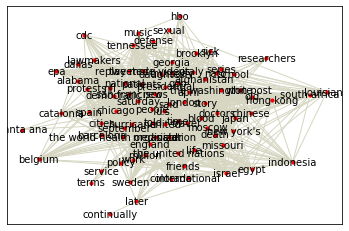

In [ ]:
from communities.algorithms import louvain_method
from communities.visualization import draw_communities
import random

keyword_nxGraph = keyword_graph.nxGraph
random_index = [random.randrange(0, len(keyword_nxGraph)) for i in range(100)]

random_index = [random.randrange(0, 100) for i in range(100)]

selected_nodes = [n[0] for i,n in enumerate(keyword_nxGraph.nodes(data=True)) if i in random_index]  

keyword_nxGraph_subgraph = keyword_nxGraph.subgraph(selected_nodes)

nx.draw_networkx(keyword_nxGraph_subgraph, node_size=10,font_size=10, node_color="#f70000", edge_color="#d6d6c2") 


plt.show() 
# selected_nodes = [n for i,n,v in enumerate(keyword_nxGraph.nodes(data=True)) if i in random_index]

# Visualize graph

Visualization to test:

https://github.com/shobrook/communities

https://cambridge-intelligence.com/python-graph-visualization-using-jupyter-regraph/

https://github.com/BrambleXu/news-graph

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

Not in python:

https://gephi.org/

draw(): draw the graph as a simple representation with no node labels or edge labels and using the full Matplotlib figure area and no axis labels by default. See draw_networkx() for more full-featured drawing that allows title, axis labels etc.

draw_networkx(): draw the graph with Matplotlib with options for node positions, labeling, titles, and many other drawing features. See draw() for simple drawing without labels or axes.

#https://stackoverflow.com/questions/45350222/select-nodes-and-edges-form-networkx-graph-with-attributes

# CDlib - Community Discovery Library

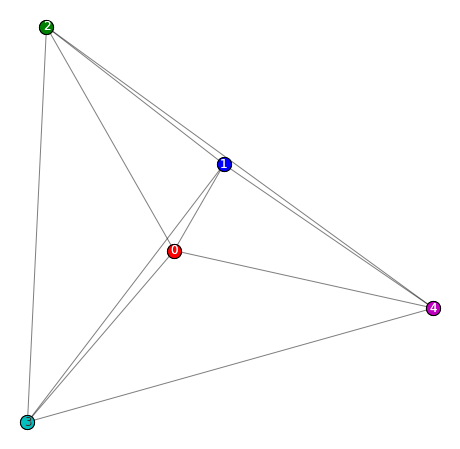

In [ ]:
from cdlib import algorithms, viz

keyword_communities = algorithms.louvain(keyword_nxGraph, weight='weight', resolution=1., randomize=False)

viz.plot_community_graph(keyword_nxGraph, keyword_communities, plot_labels= True)


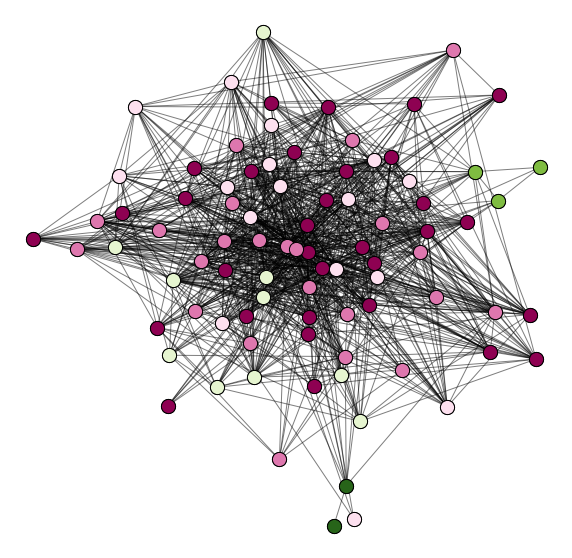

In [ ]:
keyword_communities = algorithms.louvain(keyword_nxGraph_subgraph, weight='weight', resolution=1., randomize=False)
keyword_pos = nx.spring_layout(keyword_nxGraph_subgraph)
viz.plot_network_clusters(keyword_nxGraph_subgraph, keyword_communities, keyword_pos, figsize=(10, 10), cmap="PiYG", plot_labels= False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=902703f2-430f-48f3-ba3f-6c2fee66cf11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>